<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Naumaan Nayyar_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [7]:
# Answer:
movies.dtype.

SyntaxError: invalid syntax (<ipython-input-7-cea7498b7adc>, line 2)

#### Calculate the average movie duration.

In [8]:
# Answer:
round(movies["duration"].mean(),2)

120.98

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [9]:
# Answer:
movies["duration"].max()

242

In [10]:
movies["duration"].min()

64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

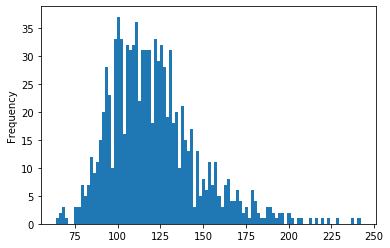

In [11]:
# Answer:
##how to decide the appropriate bins? decide on how precisely the figure shows?
movies.duration.plot(kind = "hist", bins = 100)

#### Use a box plot to display that same data.

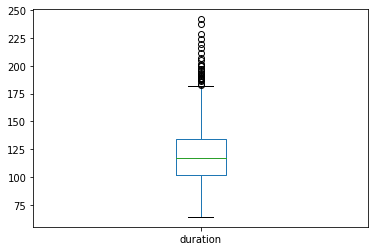

In [12]:
# Answer:
movies.duration.plot(kind = "box")

#### Naumaan: Good job! Just one partial answer, all others correct!

13 points

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

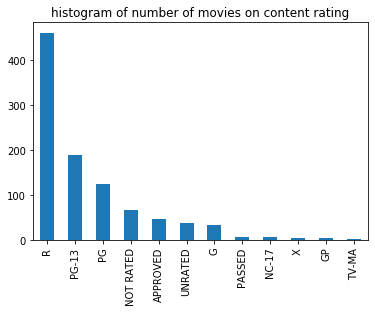

In [14]:
# Answer: group by categorical features, use the bar charts
df = movies.content_rating.value_counts()
df.plot(kind = 'bar', title = "histogram of number of movies on content rating")
plt.xlabel = "content of rating" 
plt.ylabel = "number of movies"

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [18]:
# Answer:
movies.content_ratings.replace(["NOT RATED", "APPROVED", "PASSED"], "UNRATED", inplace = TRUE)


AttributeError: 'DataFrame' object has no attribute 'content_ratings'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [19]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'],"NC-17", inplace = True)

#### Count the number of missing values in each column.

In [20]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [21]:
# Answer: python need full name of -"True"
movies.content_rating.fillna("reasonable", inplace = True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [22]:
# Answer:
round(movies[movies.duration>=120].star_rating.mean(),2)

7.95

In [23]:
round(movies[movies.duration<120].star_rating.mean(),2)

7.84

#### Use a visualization to detect whether there is a relationship between duration and star rating.

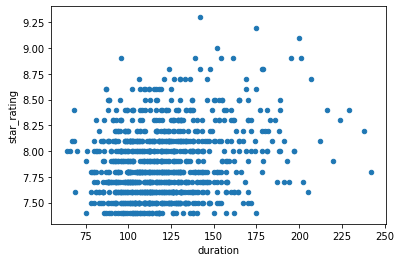

In [24]:
# Answer:if nay reference line is required?
movies.plot(kind = "scatter", x = 'duration', y = 'star_rating')

#### Calculate the average duration for each genre.

In [25]:
# Answer:
round(movies.groupby("genre").mean(),2)

,star_rating,duration
genre,,
Action,7.88,126.49
Adventure,7.93,134.84
Animation,7.91,96.60
Biography,7.86,131.84
Comedy,7.82,107.60
Crime,7.92,122.30
Drama,7.90,126.54
Family,7.85,107.50
Fantasy,7.70,112.00


In [26]:
movies.content_rating.value_counts()

R             460
PG-13         189
PG            123
NOT RATED      65
APPROVED       47
UNRATED        38
G              32
NC-17          12
PASSED          7
reasonable      3
GP              3
Name: content_rating, dtype: int64

###### Naumaan: Good job on all but one question, where you have a typo in your response that led to the content_rating column not getting updated correctly.

17 points

## Advanced level

#### Visualize the relationship between content rating and duration.

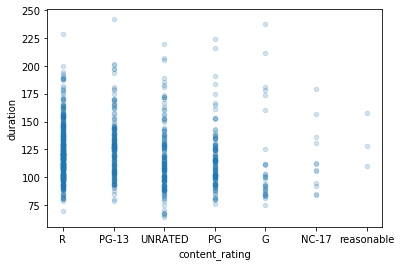

In [123]:
# Answer:
movies.plot(kind = 'scatter', x = 'content_rating', y = 'duration', alpha = 0.2)

#### Determine the top rated movie (by star rating) for each genre.

In [82]:
# Answer: why couldn'tg use row[1], not sure first last/final, is the row n, but head, tail are....
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [108]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [ ]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

#### Option 1: manually create a list of relevant genres, then filter using that list

In [87]:
# Answer:
genres = {"Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Family","Fantasy","Film-Noir","History","Horror","Mystery","Sci-Fi","Thriller","Western"}

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [126]:
# Answer:
movies.genre.value_counts()
movies[movies.genre.isin(genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [93]:
round(movies[movies.genre.isin(genres)].groupby('genre').star_rating.mean(),)

genre
Action       8.0
Adventure    8.0
Animation    8.0
Biography    8.0
Comedy       8.0
Crime        8.0
Drama        8.0
Family       8.0
Fantasy      8.0
Film-Noir    8.0
History      8.0
Horror       8.0
Mystery      8.0
Sci-Fi       8.0
Thriller     8.0
Western      8.0
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [127]:
# Answer: what means using booleans?
round(movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10],2)

genre
Action       7.88
Adventure    7.93
Animation    7.91
Biography    7.86
Comedy       7.82
Crime        7.92
Drama        7.90
Horror       7.81
Mystery      7.98
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [128]:
# Answer:
movies.groupby('genre').star_rating.agg(["mean", "count"])[movies.genre.value_counts()>=10]

C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


#### Naumaan: Good job!

16 points

## Bonus

#### Figure out something "interesting" using the actors data!

## Total: 46 points